In [1]:
from environments.PlantSimulator import PlantSimulator
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

### Approximate actual leaf area

In [2]:
# Import historic leaf data
data_path = os.path.dirname(os.path.abspath("")) + '/analysis/plant_data/plant_area_data.csv'
df = pd.read_csv(data_path).sort_values(by='timestamp')

# Set some params and choose plant to analyze
steps_per_day = 72
plant_id = 5
data = np.array(df.iloc[:, plant_id])

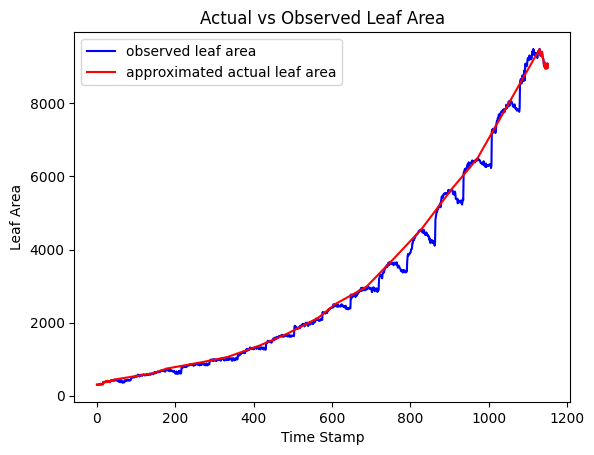

In [6]:
# Assume the largest observed area in each day IS the actual area at that moment
# Interpolate (linearly for now) between largest observed areas of consecutive days

observed_area = np.reshape(data, (-1, steps_per_day))  # reshape into different days
max_indices = np.argmax(observed_area, axis=1)         # index at the max value of each day

actual_area = np.copy(data)
for i in range(observed_area.shape[0]-1):
    min_id = i*steps_per_day + max_indices[i]
    max_id = (i+1)*steps_per_day + max_indices[i+1]
    actual_area[min_id:max_id] = np.interp(np.arange(min_id, max_id), [min_id, max_id], [data[min_id],data[max_id]])

# Plot the actual vs observed area
plt.plot(observed_area.reshape(-1), 'b', label='observed leaf area')
plt.plot(actual_area, 'r', label='approximated actual leaf area')
plt.title(f'Actual vs Observed Leaf Area')
plt.xlabel('Time Stamp')
plt.ylabel('Leaf Area')
plt.legend()
plt.show()

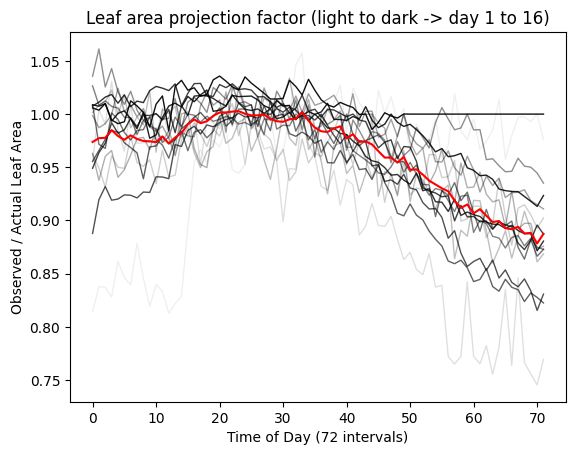

In [4]:
# Plot the projection factor (observed area / actual area) to see if it's consistent every day

projection_factor = np.reshape(data/actual_area, (-1, steps_per_day))

for i in range(observed_area.shape[0]):
    row = projection_factor[i]
    plt.plot(row, alpha=1/16*i, color='k', linewidth=1)
plt.plot(np.mean(projection_factor, axis=0), 'r', label='average projection factor')
plt.title('Leaf area projection factor (light to dark -> day 1 to 16)')
plt.xlabel(f'Time of Day ({steps_per_day} intervals)')
plt.ylabel(f'Observed / Actual Leaf Area')
plt.show()

### Looking for monotonically increasing growth indicator

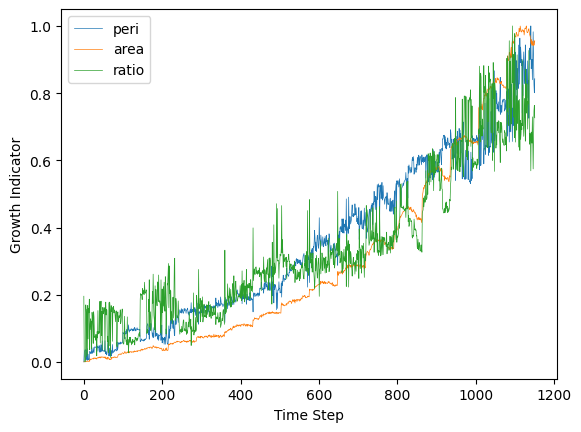

In [5]:
data_path = os.path.dirname(os.path.abspath("")) + '/analysis/plant_data/plant_all_data.csv'
all_df = pd.read_csv(data_path).sort_values(by='timestamp')

plant_id = 5
sub_df = all_df[all_df['plant_id'] == plant_id]  

area = np.array(sub_df['area'])
peri = np.array(sub_df['perimeter'])

# Moving average (optional)
window_size = 1
area = np.convolve(area, np.ones(window_size)/window_size, mode='valid')
peri = np.convolve(peri, np.ones(window_size)/window_size, mode='valid')
ratio = area / peri

# Normalize for comparison
ratio = (ratio-np.min(ratio))/(np.max(ratio)-np.min(ratio))
area = (area-np.min(area))/(np.max(area)-np.min(area))
peri = (peri-np.min(peri))/(np.max(peri)-np.min(peri))

plt.plot(peri, label='peri', linewidth=0.5)
plt.plot(area, label='area', linewidth=0.5)
plt.plot(ratio, label='ratio', linewidth=0.5)
plt.xlabel('Time Step')
plt.ylabel('Growth Indicator')
plt.legend()
plt.show()